# CS 663 Assignment 2 - KMeans

For my implementation of KMeans, please see KMeans.py in the repo.

In this Jupyter Notebook, we start with portion 2 of the assignment: performance analysis.

## Portion 2

First, we import all necessary libraries we expect to need throughout this assignment in the below cell.

In [1]:
from sklearn.datasets import make_blobs # used to generate clusters using the sklearn make_blobs function
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, AgglomerativeClustering # sklearn clustering algorithms
from sklearn.neighbors import NearestNeighbors # used for finding optimal epsilon later on
from sklearn.preprocessing import normalize, StandardScaler # used to normalize data
from sklearn import metrics # used to evaluate clustering output
from KMeans import *  # own implementation of KMeans algorithms

import matplotlib.pyplot as plt # matplotlib
import seaborn as sns # seaborn
from scipy.cluster.hierarchy import linkage, dendrogram

import pandas as pd # pandas dataframe
import numpy as np # numpy

As instructed, we generate 700 instances of data points in 2D space belonging to one of 4 clusters using the below provided code.

In [2]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

In the below 2 cells, let's examine what X and cluster_assignments actually are:

In [3]:
X

array([[-0.84177847,  7.86655225],
       [-1.21515296,  8.01484649],
       [ 1.84320847, -0.07222085],
       ...,
       [-1.83141457,  2.2867542 ],
       [-1.84639796,  3.30491543],
       [ 0.28256062,  4.77250619]])

In [4]:
cluster_assignments

array([3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 0, 1, 3, 1, 2, 0, 0, 3, 1, 3, 1, 1,
       2, 1, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 1, 3, 3, 1, 1, 0, 0, 1, 1, 2,
       1, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0, 2, 1, 3, 0, 1, 2, 1, 2, 2, 3, 0,
       1, 2, 1, 1, 3, 1, 3, 3, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 3, 0, 2,
       0, 2, 3, 3, 0, 3, 3, 3, 2, 1, 3, 3, 3, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 3, 3, 2, 2, 0, 1, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3,
       2, 1, 0, 3, 3, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 3, 2, 1, 0, 2, 0, 1,
       0, 3, 3, 1, 0, 2, 3, 0, 0, 2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 0, 0, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 3, 2, 2,
       2, 0, 1, 1, 1, 3, 0, 0, 2, 2, 1, 3, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1,
       0, 3, 1, 3, 3, 2, 0, 1, 1, 0, 3, 3, 3, 3, 0, 2, 3, 1, 1, 3, 0, 3,
       3, 0, 0, 1, 1, 0, 1, 2, 2, 2, 3, 1, 2, 0, 3, 0, 3, 3, 3, 2, 0, 2,
       2, 3, 3, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 3, 3, 1, 1, 2, 1, 1, 3, 0, 1, 3, 2, 0, 0,

It would probably be more helpful to produce a chart of this output, so we do that with the help of matplotlib.

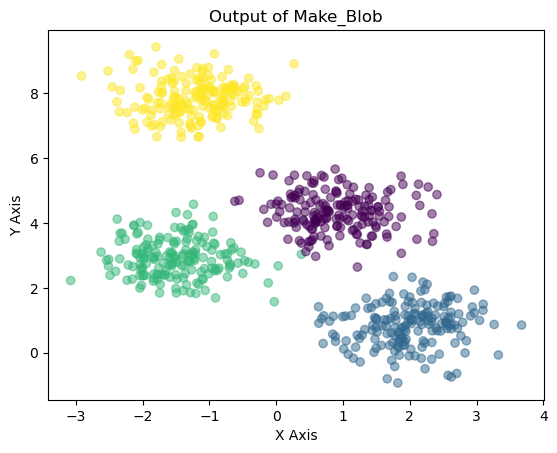

In [5]:
plt.scatter(x=X[:,0], y=X[:,1], c=cluster_assignments, alpha=0.5)
plt.title("Output of Make_Blob")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

Now that we verified make_blob actually created what we wanted, we can see actually there is at least 1 instance where the point is not belonging to a cluster that we believe they should. Let's do a count of the elements within each cluster to see if maybe the number of elements within each cluster are equal.

In [6]:
np.unique(cluster_assignments, return_counts=True)

(array([0, 1, 2, 3]), array([175, 175, 175, 175]))

Indeed, seems like the number of instances within each cluster is the same. At this point I expect there will likely be some differences between the output of KMeans from sklearn and my own implementation versus the output of this make_blob function. But let's continue with running KMeans from sklearn first:

In [7]:
# KMeans from scikit-learn

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/Users/lawrence/anaconda3/envs/CS_663_v3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [8]:
kmeans.cluster_centers_

array([[-1.20405793,  7.83785843],
       [ 0.90043932,  4.32217464],
       [ 1.9877063 ,  0.83188579],
       [-1.49970942,  2.90574194]])

In [9]:
kmeans.labels_

array([0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 3, 1, 1, 0, 2, 0, 2, 2,
       3, 2, 3, 0, 1, 3, 3, 3, 3, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 3,
       2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 3, 2, 0, 1, 2, 3, 2, 3, 3, 0, 1,
       2, 3, 2, 2, 0, 2, 0, 0, 2, 3, 3, 1, 1, 1, 3, 3, 3, 2, 2, 0, 1, 3,
       1, 3, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 2, 3, 3, 2, 2, 2, 1, 1, 3,
       2, 1, 1, 2, 1, 1, 0, 0, 3, 3, 1, 2, 3, 0, 3, 0, 0, 3, 2, 0, 1, 0,
       3, 2, 1, 0, 0, 3, 1, 1, 3, 1, 2, 2, 3, 2, 3, 0, 3, 2, 1, 3, 1, 2,
       1, 0, 0, 2, 1, 3, 0, 1, 1, 3, 0, 0, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2,
       1, 2, 1, 1, 2, 0, 3, 0, 2, 3, 3, 3, 3, 2, 3, 0, 2, 1, 1, 0, 3, 3,
       3, 1, 2, 2, 2, 0, 1, 1, 3, 3, 2, 0, 2, 0, 3, 0, 1, 1, 1, 0, 2, 2,
       1, 0, 2, 0, 0, 3, 1, 2, 2, 1, 0, 0, 0, 0, 1, 3, 0, 2, 2, 0, 1, 0,
       0, 1, 1, 2, 2, 1, 2, 3, 3, 3, 0, 2, 3, 1, 0, 1, 0, 0, 0, 3, 1, 3,
       3, 0, 0, 1, 3, 1, 1, 1, 3, 2, 1, 3, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1,
       2, 0, 0, 2, 2, 3, 2, 2, 0, 1, 2, 0, 3, 1, 1,

In [10]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([175, 176, 175, 174]))

So at first glance we can already see that there will be at least 1 instance where there exists a mismatch between the output of make_blobs and sklearn's KMeans. We can also see the numerical output of the centers of the 4 centroids as well as the label for all points. Let's plot the KMeans output to visualize this better:

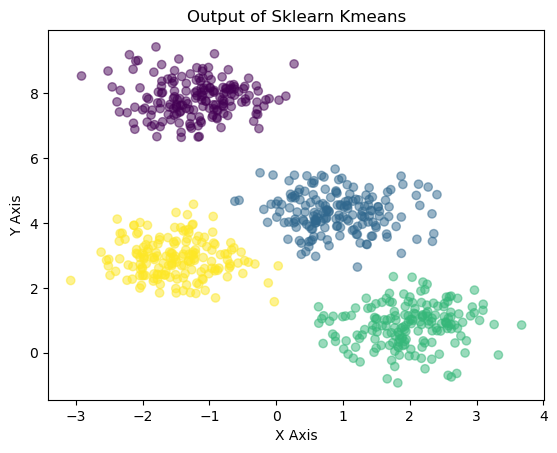

In [11]:
plt.scatter(x=X[:,0], y=X[:,1], c=kmeans.labels_, alpha=0.5)
plt.title("Output of Sklearn Kmeans")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

Even though the colors do not match between the two plots, we can clearly see that the clusters are grouped accordingly just like before with the exception of the 1 point that has moved cluster.

Let's now use our own KMeans algorithm and see what our algorithm outputs:

In [12]:
# Our own KMeans implementation

own_kmeans = Own_KMeans(k=4, max_iterations=300) # set iteration to same value as sklearn's default
cluster_hypothesis, cluster_centroid = own_kmeans.fit(X)

In [13]:
cluster_centroid

[[-1.4997094181421273, 2.905741940858994],
 [1.9877063026473267, 0.8318857877497889],
 [-1.2040579337244173, 7.837858432492295],
 [0.9004393234899267, 4.32217463716]]

In [14]:
np.unique(cluster_hypothesis, return_counts=True)

(array([0, 1, 2, 3]), array([174, 175, 175, 176]))

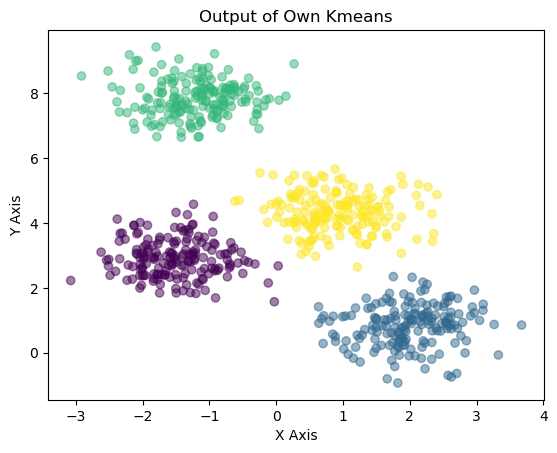

In [15]:
plt.scatter(x=X[:,0], y=X[:,1], c=cluster_hypothesis, alpha=0.5)
plt.title("Output of Own Kmeans")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

From the graphs and outputs from both sklearn's KMeans and my own implementation of KMeans, we can see that the clusters match up exactly the same. 2 clusters in both implementations contain 175 instances, 1 cluster contains 174 instances, and the remaining cluster contains 176 instances. 

To make a comprehensive comparison, we will say the following:

1. When evaluating my own implementation's hypotheses against the expected values in cluster_assignments, we can see that there is only 1 point where the cluster that it belongs to is different between these two. The point is the green point closest to the purple cluster in the following image.

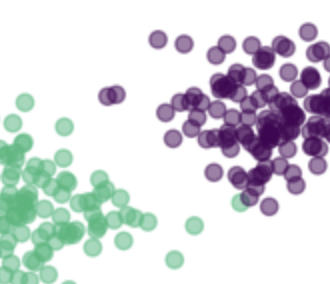

2. When evaluating my own implementation's hypotheses against the hypotheses generated by scikit-learn, we can see that the outputs are a perfect match as shown by the below graphs (with the exception that the colors of the clusters have changed due to the different ordering of the cluster centroid output)

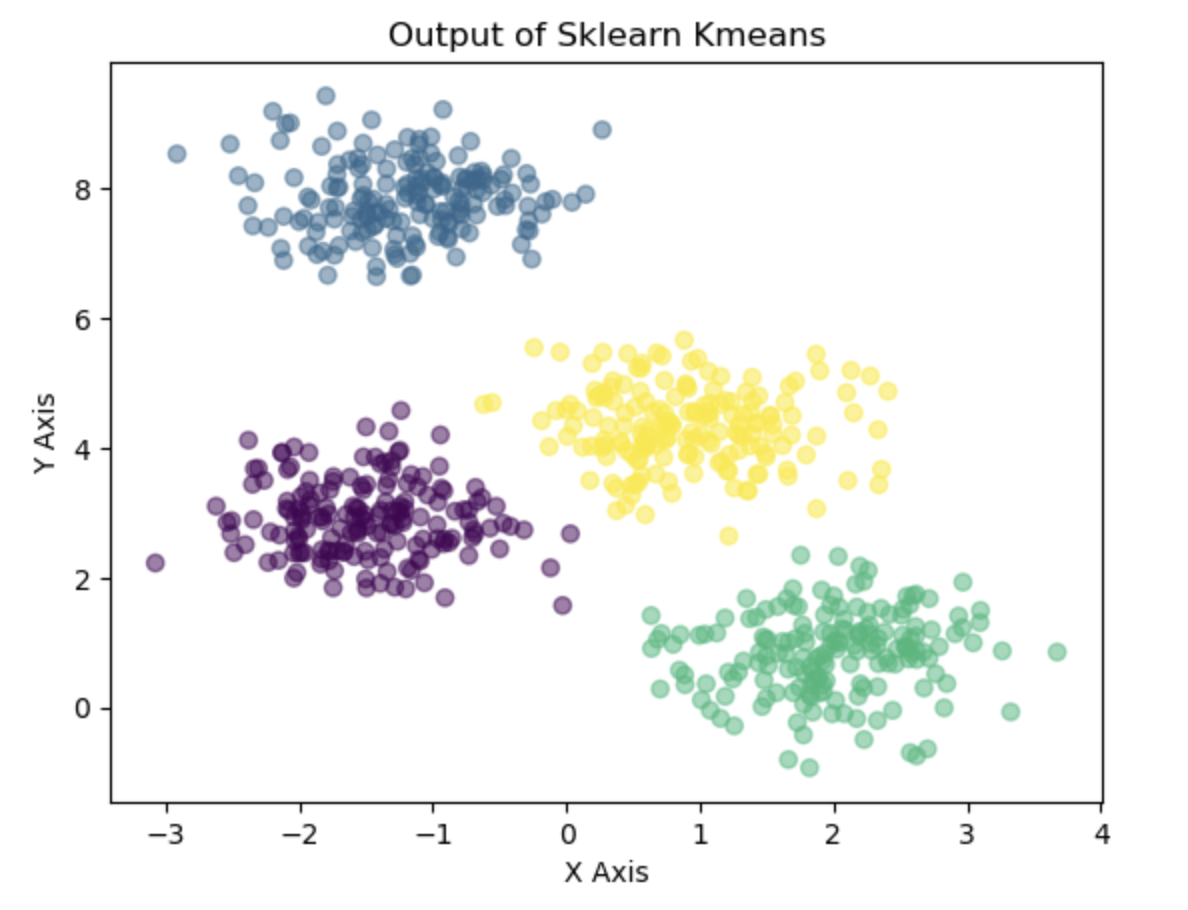

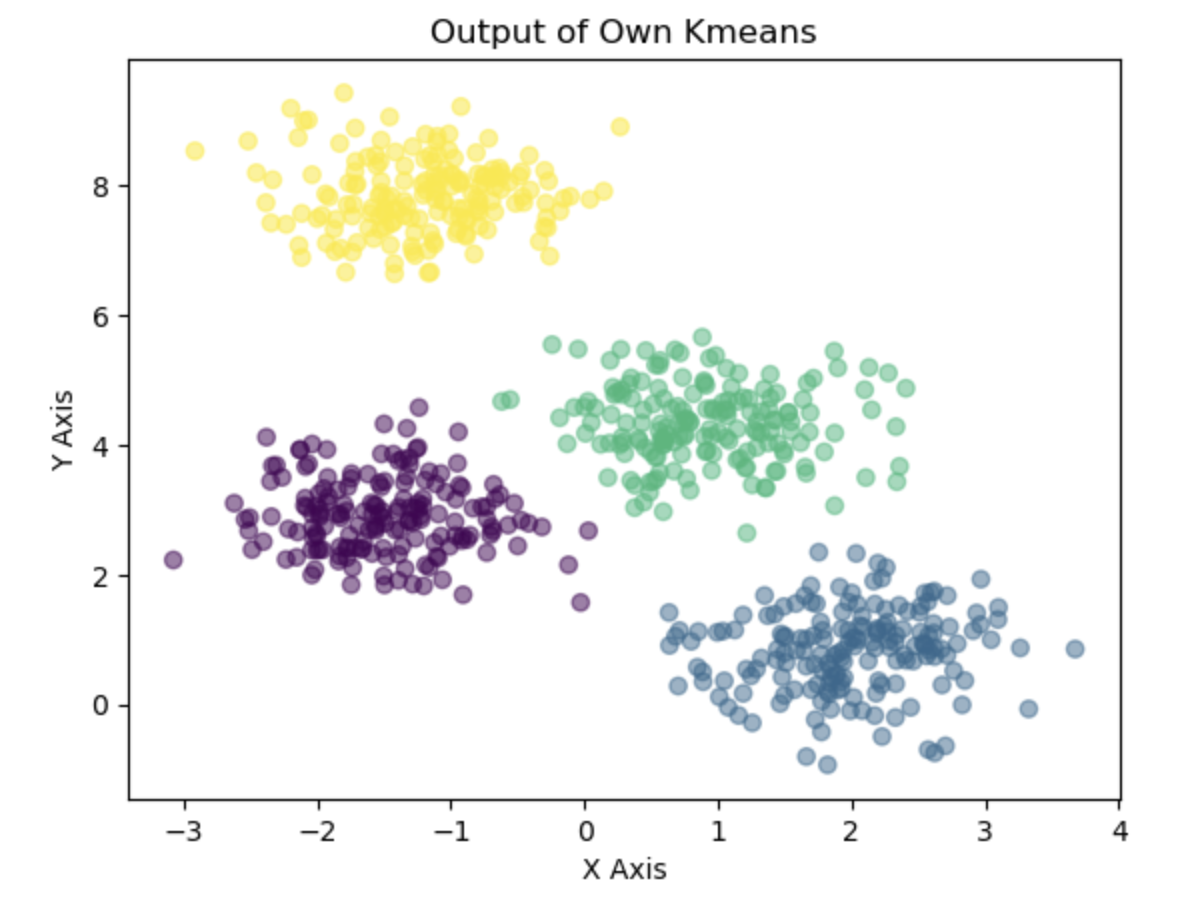

We will now move on to the 3rd portion of the assignment, choosing and running clustering algorithms on the Chicago taxi dataset and the Mopsi dataset.

## Portion 3

Let's start with the Chicago taxi dataset.

### Chicago Taxi Data

Let's load in the CSV of the dataset with pandas and do some EDA.

In [16]:
taxi_df = pd.read_csv("Taxi_Trips__2013-2023_.csv")
taxi_df

Trip ID  \
0       52dc9029821e61db30a51838cb3cd711bd0e03cb   
1       11eeb6710caa0606028c7ba025bfa18c277886e8   
2       113aa7bf346c585bb941cda2d5c0015c8a1472f0   
3       2503e3944e5c82b89638447ad361638111129375   
4       23ddcfba2ad714fe0303909961ea74873be50da2   
...                                          ...   
101783  9209df4c3541198fda3173a226f2df619a806022   
101784  f0957a8f6bef37bb2872649fb3c76ad1a179acab   
101785  4cb74df671cfccceb9b592f347ef1a94c1540c7a   
101786  7f24c5101df65952ef318f558b8b071989ff7c17   
101787  1f64a83220a6df1917fe617cca37f155d6f477ff   

                                                  Taxi ID  \
0       275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...   
1       6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...   
2       bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...   
3       57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...   
4       40720025b84fa778c47d6637db01b1d8f2de2eabafa529...   
...                                                   ...   
101783  dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...   
101784  3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...   
101785  b31f46efa11263565e3dba91f26ff96b74516e8108ac56...   
101786  65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...   
101787  67cdd41437563bed53a4348a0a050d03bfb80df4cc2519...   

          Trip Start Timestamp      Trip End Timestamp  Trip Seconds  \
0       02/01/2023 12:15:00 AM  02/01/2023 12:30:00 AM        1140.0   
1       02/01/2023 12:15:00 AM  02/01/2023 12:15:00 AM         660.0   
2       02/01/2023 12:15:00 AM  02/01/2023 12:30:00 AM         480.0   
3       02/01/2023 12:15:00 AM  02/01/2023 12:45:00 AM        1620.0   
4       02/01/2023 12:15:00 AM  02/01/2023 12:15:00 AM         360.0   
...                        ...                     ...           ...   
101783  02/07/2023 11:45:00 PM  02/07/2023 11:45:00 PM         760.0   
101784  02/07/2023 11:45:00 PM  02/07/2023 11:45:00 PM           4.0   
101785  02/14/2023 10:30:00 AM  02/14/2020 06:00:00 PM           NaN   
101786  04/27/2023 11:15:00 AM  04/21/2019 09:30:00 PM           NaN   
101787  12/13/2023 03:00:00 PM  09/29/2011 04:45:00 PM           NaN   

        Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
0            11.20                  NaN                   NaN   
1             2.70                  NaN                   NaN   
2             0.00                  NaN                   NaN   
3             0.00         1.703198e+10                   NaN   
4             0.10                  NaN                   NaN   
...            ...                  ...                   ...   
101783        2.69         1.703183e+10          1.703132e+10   
101784        0.00                  NaN                   NaN   
101785        2.90                  NaN                   NaN   
101786       15.10                  NaN                   NaN   
101787       13.20                  NaN                   NaN   

        Pickup Community Area  Dropoff Community Area  ...  Extras  \
0                        76.0                     NaN  ...    21.0   
1                        32.0                     7.0  ...     0.0   
2                         8.0                    24.0  ...     0.0   
3                        76.0                     NaN  ...    28.0   
4                        76.0                     NaN  ...     4.0   
...                       ...                     ...  ...     ...   
101783                   28.0                    32.0  ...     0.0   
101784                    8.0                     8.0  ...     0.0   
101785                    8.0                    24.0  ...     0.0   
101786                   76.0                     7.0  ...     4.0   
101787                    NaN                     NaN  ...     7.0   

        Trip Total  Payment Type                        Company  \
0            49.75          Cash   4053 - 40193 Adwar H. Nikola   
1            13.00   Credit Card      Taxi Affiliation Service

In [17]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [18]:
taxi_df.describe()

Trip Seconds     Trip Miles  Pickup Census Tract  \
count  101763.000000  101788.000000         3.517900e+04   
mean     1102.644891       6.021135         1.703149e+10   
std      1831.031101       7.572349         3.696445e+05   
min         0.000000       0.000000         1.703101e+10   
25%       420.000000       0.870000         1.703108e+10   
50%       836.000000       2.600000         1.703132e+10   
75%      1516.000000      10.800000         1.703184e+10   
max     86003.000000     814.300000         1.703198e+10   

       Dropoff Census Tract  Pickup Community Area  Dropoff Community Area  \
count          3.505400e+04           95650.000000            92192.000000   
mean           1.703140e+10              33.230946               25.300764   
std            3.377955e+05              25.309183               20.270499   
min            1.703101e+10               1.000000                1.000000   
25%            1.703108e+10               8.000000                8.000000   
50%            1.703132e+10              32.000000               28.000000   
75%            1.703184e+10              50.000000               32.000000   
max            1.703198e+10              77.000000               77.000000   

                Fare           Tips          Tolls         Extras  \
count  101681.000000  101681.000000  101681.000000  101681.000000   
mean       20.466054       2.452347       0.014503       1.679117   
std        18.103452       3.918353       0.602782       5.208910   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.750000       0.000000       0.000000       0.000000   
50%        13.500000       0.000000       0.000000       0.000000   
75%        31.000000       3.000000       0.000000       1.000000   
max       999.000000     250.000000      78.000000     182.000000   

          Trip Total  Pickup Centroid Latitude  Pickup Centroid Longitude  \
count  101681.000000              95657.000000               95657.000000   
mean       24.739358                 41.898703                 -87.689956   
std        22.641634                  0.064621                   0.104274   
min         0.000000                 41.660136                 -87.913625   
25%         9.500000                 41.878866                 -87.695013   
50%        16.000000                 41.895033                 -87.642649   
75%        33.900000                 41.949829                 -87.626211   
max       999.000000                 42.015934                 -87.534903   

       Dropoff Centroid Latitude  Dropoff Centroid Longitude  
count               92489.000000                92489.000000  
mean                   41.892116                  -87.657546  
std                     0.059306                    0.063430  
min                    41.660136                  -87.913625  
25%                    41.878866                  -87.663518  
50%                    41.892508                  -87.633308  
75%                    41.922686                  -87.625192  
max                    42.021224                  -87.534903

So from the above outputs, we can see that there are 101788 rows of data with a total of 23 columns. The column data are either represented as a string or as a float. There are certain columns that appear to be missing quite a few bit of data, such as "Pickup Census Tract" and "Dropoff Census Tract". For the purpose of this assignment, we will restrict clustering to using only location data (pickup or dropoff location coordinates) due to the size of the total data. 

Something of note is also that the columns "Pickup Community Area" and "Dropoff Community Area" appears to contain only integer values from 1 to 77. This suggests that maybe there are 77 "community areas" in the Chicago area and it would be interesting to see if it is possible to cluster pickup/dropoff locations according to these 77 areas just by using location data. This might be excessive but we can perform some more Univariate Analysis on the data first.

### Univariate Analysis

In [19]:
taxi_df["Pickup Community Area"].value_counts()

Pickup Community Area
8.0     21247
76.0    16000
32.0    15806
28.0    10661
6.0      3491
        ...  
57.0       29
64.0       28
9.0        26
63.0       24
18.0       19
Name: count, Length: 77, dtype: int64

In [20]:
taxi_df["Dropoff Community Area"].value_counts()

Dropoff Community Area
8.0     22577
32.0    15222
28.0    10057
6.0      4662
7.0      4074
        ...  
57.0       35
63.0       35
55.0       33
74.0       30
47.0       29
Name: count, Length: 77, dtype: int64

Indeed the above outputs confirm what we thought. Let's try plotting the pickup and dropoff locations via their latitude and longitude data and see if the data reflects an approximate map of the Chicago area.

Text(0.5, 1.0, 'Pickup Centroid Locations')

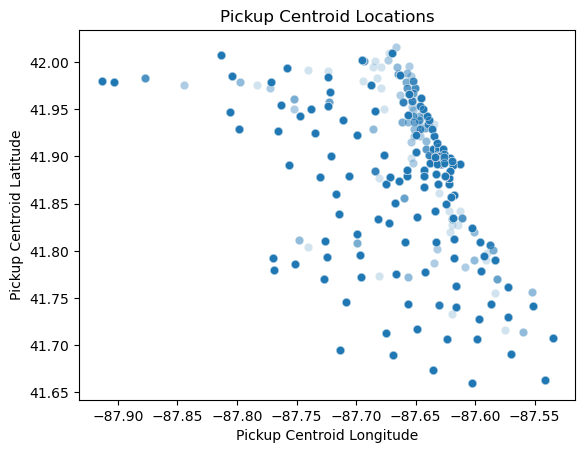

In [21]:
sns.scatterplot(data=taxi_df, x="Pickup Centroid Longitude", y="Pickup Centroid Latitude", alpha=0.2).set_title("Pickup Centroid Locations")

Text(0.5, 1.0, 'Dropoff Centroid Locations')

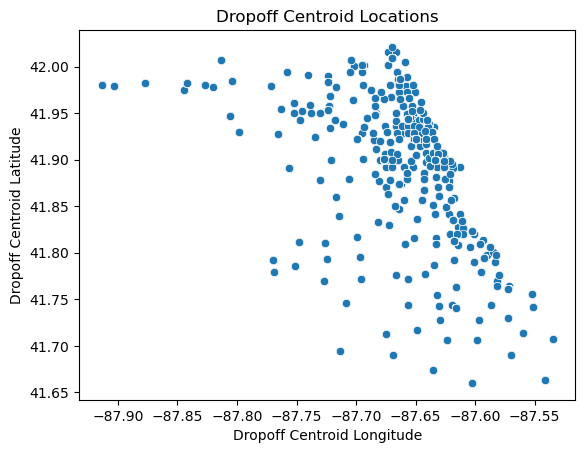

In [22]:
sns.scatterplot(data=taxi_df, x="Dropoff Centroid Longitude", y="Dropoff Centroid Latitude").set_title("Dropoff Centroid Locations")

The scatterplots actually correspond to the Chicago area quite well! We see that the right side corresponds to the lake that Chicago is next to, and the few points at the very left edge of the plot corresponds to the airport. Below is a Google Maps image of the same area:

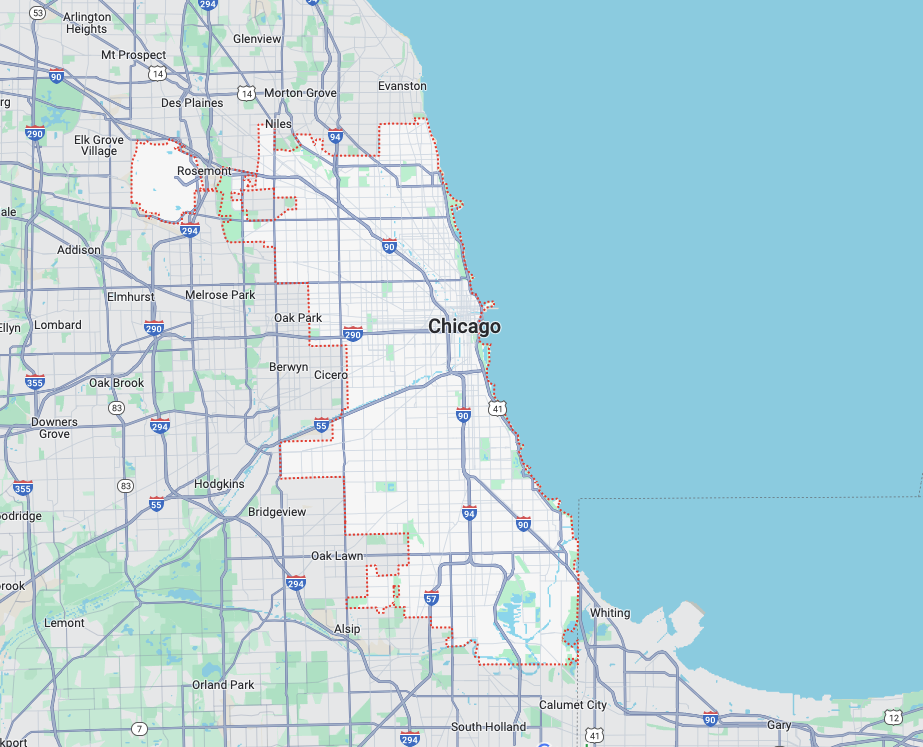

For comprehensiveness sake, let's do some pair plots to see if there's any correlations between the columns/features of the data.

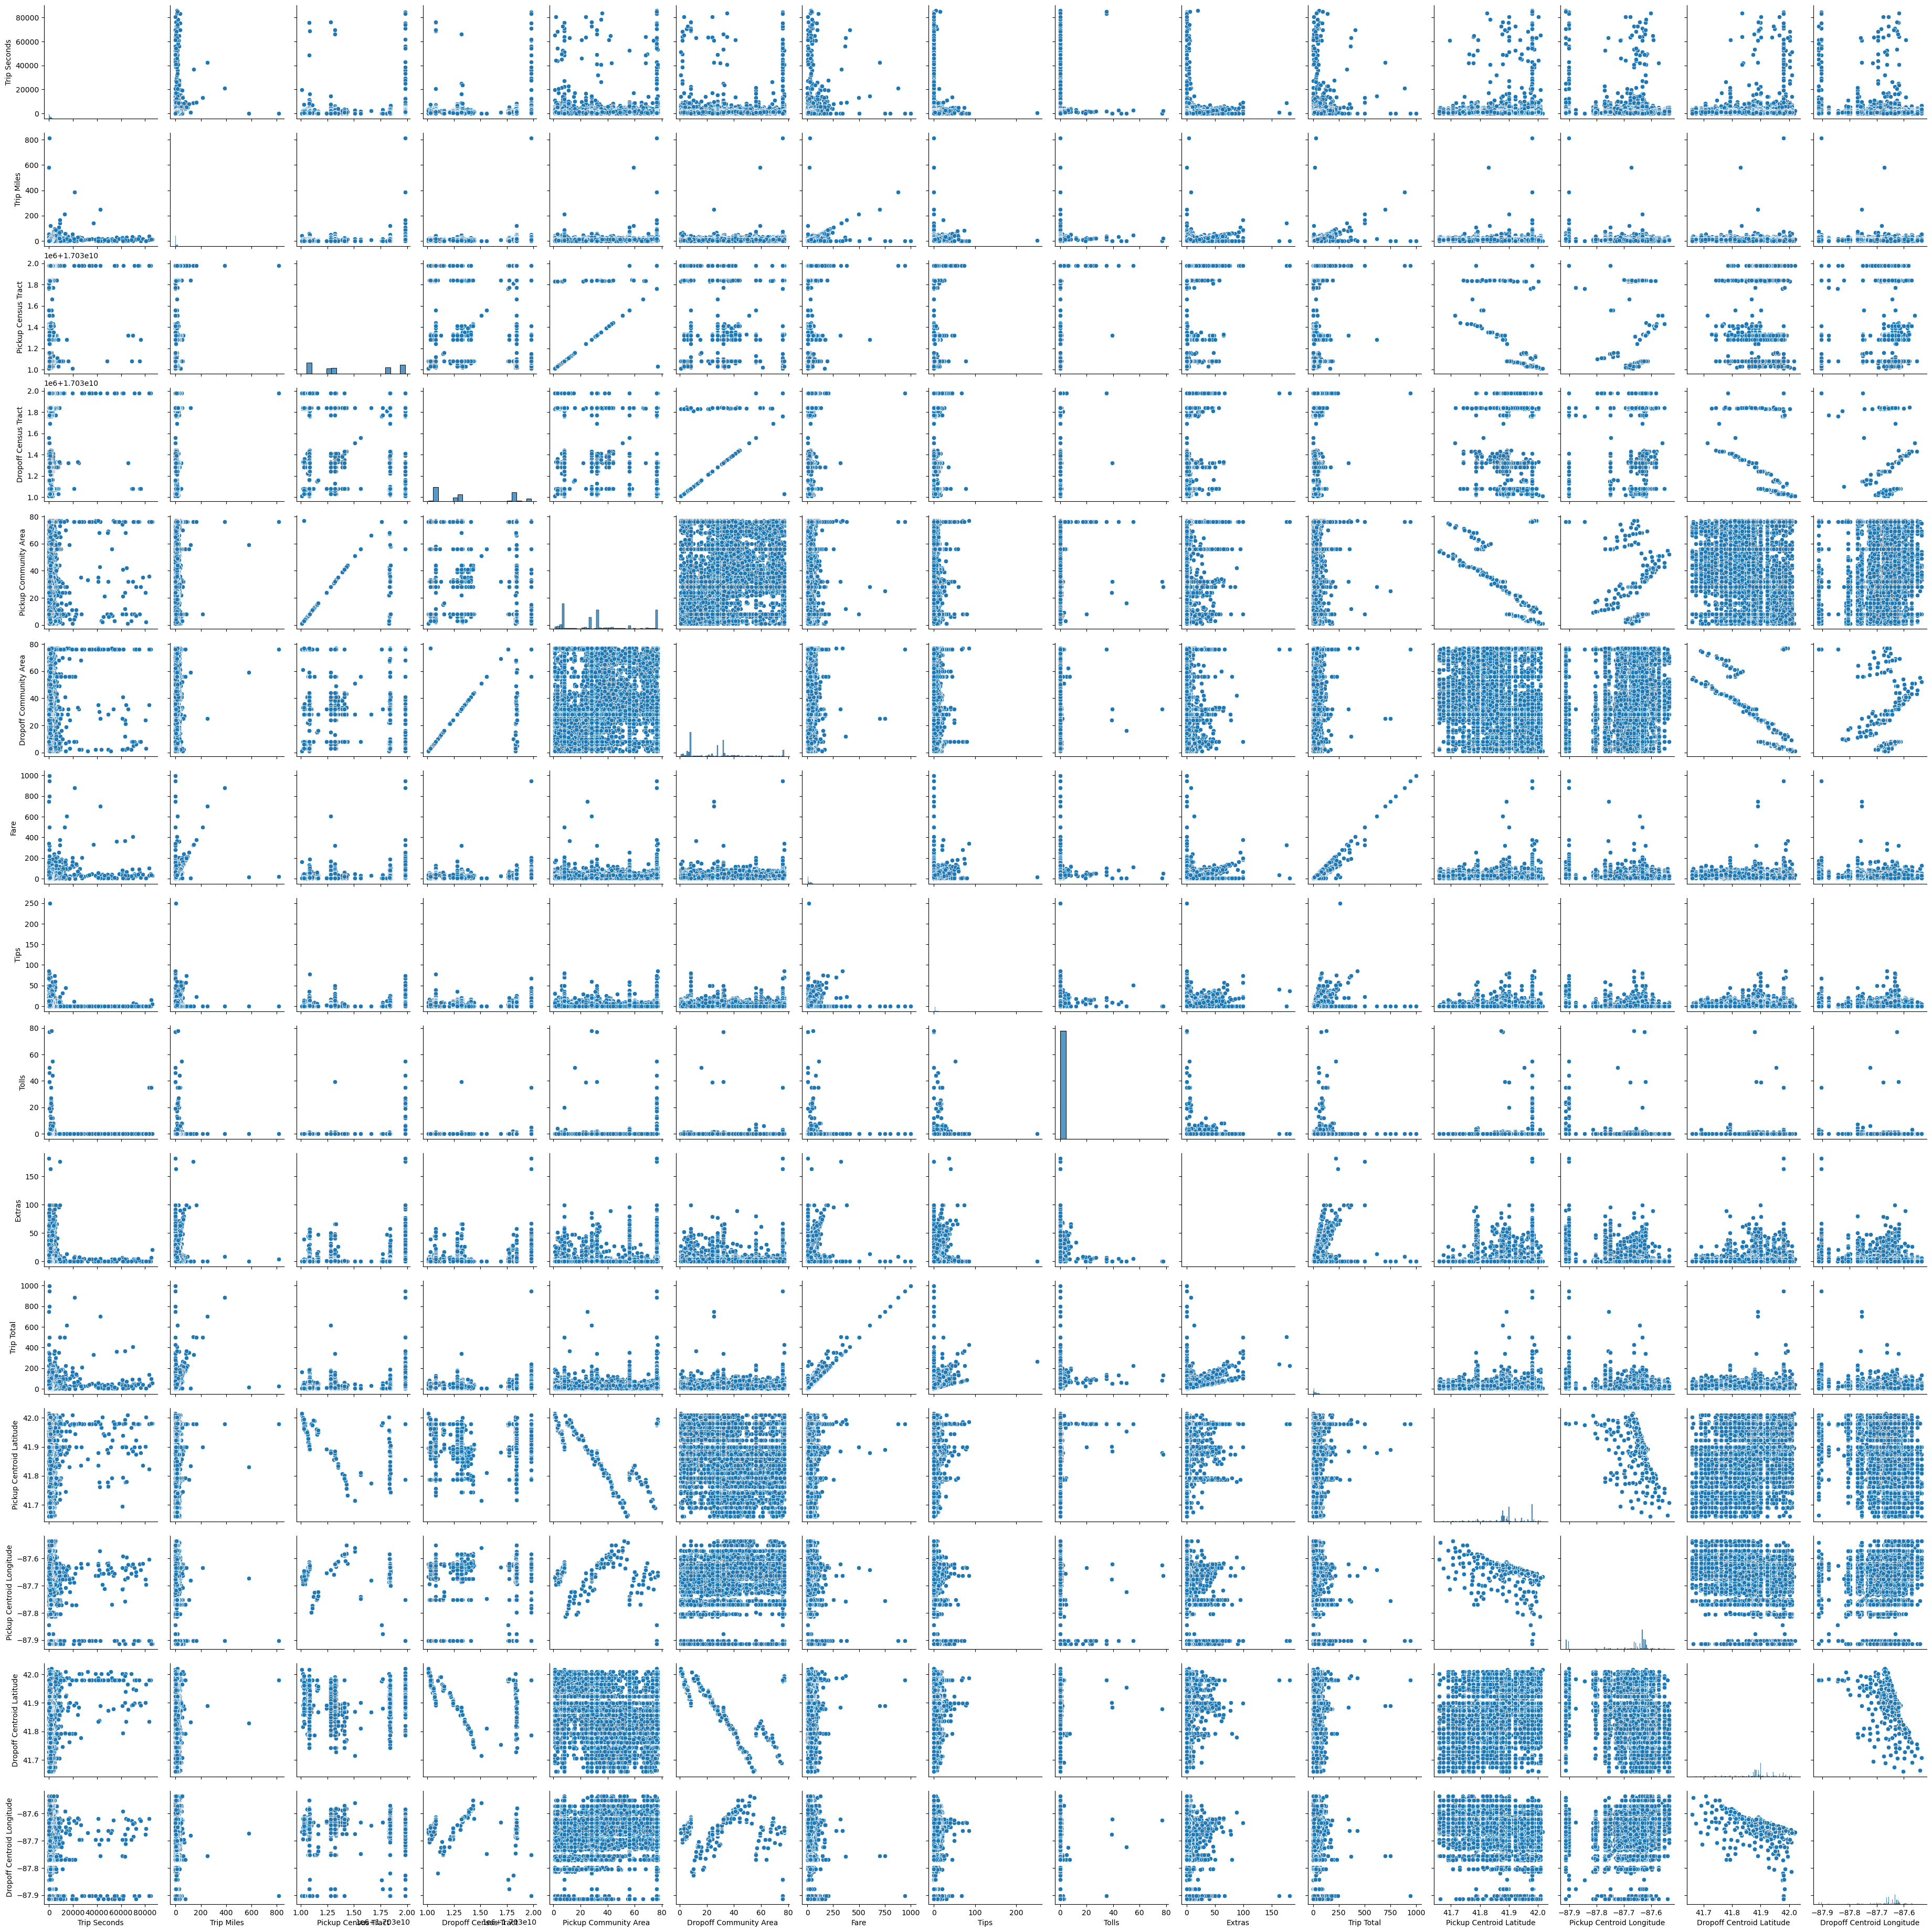

In [31]:
sns.pairplot(taxi_df)

Quite a lot of plots were produced, but again our focus is only on the pickup/dropoff locations.

For the purpose of experimentation, we will run all 3 algorithms (KMeans, DBSCAN, and Agglomerative Clustering) on this dataset. We will focus on pickup locations only. 

Let's start with KMeans.

In [23]:
# KMeans implementation

taxi_kmeans = KMeans(n_clusters=77)
taxi_df=taxi_df.dropna()
taxi_kmeans.fit(taxi_df.loc[:,["Pickup Centroid Latitude", "Pickup Centroid Longitude"]])

/Users/lawrence/anaconda3/envs/CS_663_v3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=77)

In [24]:
taxi_kmeans.cluster_centers_

array([[ 41.88498719, -87.62099291],
       [ 41.97907082, -87.90303966],
       [ 41.78599852, -87.75093429],
       [ 41.87925508, -87.642649  ],
       [ 41.95778447, -87.65300664],
       [ 41.89207263, -87.62887416],
       [ 41.79050418, -87.58340398],
       [ 41.94321025, -87.74765073],
       [ 41.88099447, -87.63274649],
       [ 41.85934972, -87.61735801],
       [ 41.89503345, -87.61971067],
       [ 41.90695305, -87.63089471],
       [ 41.83351789, -87.68135583],
       [ 41.870415  , -87.67508562],
       [ 41.87740612, -87.62197165],
       [ 41.74178677, -87.629266  ],
       [ 41.93672806, -87.6391611 ],
       [ 41.89321636, -87.63784421],
       [ 41.88533742, -87.65719747],
       [ 41.89915561, -87.62621053],
       [ 41.88530002, -87.64280847],
       [ 41.75596143, -87.55199415],
       [ 41.99050712, -87.66182286],
       [ 41.97920455, -87.79739898],
       [ 41.89092203, -87.61886836],
       [ 41.89204214, -87.63186395],
       [ 41.89250778, -87.62621491],
 

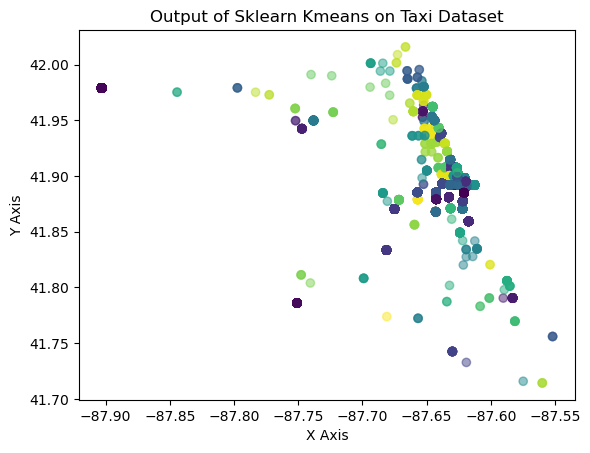

In [25]:
plt.scatter(x=taxi_df.loc[:,["Pickup Centroid Longitude"]], y=taxi_df.loc[:,["Pickup Centroid Latitude"]], c=taxi_kmeans.labels_, alpha=0.5)
plt.title("Output of Sklearn Kmeans on Taxi Dataset")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

In [26]:
taxi_kmeans.labels_

array([ 1,  1, 50, ...,  1,  2, 18], dtype=int32)

At first glance there seems to be too many clusters. This is something we can decrease, but knowing that KMeans work well with spheroidal data distribution and our map does not show such distribution, it may be best to spend time experimenting on other algorithms.

Let's try DBSCAN.

In [27]:
taxi_dbscan = DBSCAN()
taxi_dbscan.fit(taxi_df.loc[:,["Pickup Centroid Latitude", "Pickup Centroid Longitude"]])

DBSCAN()

In [28]:
np.unique(taxi_dbscan.labels_)

array([0])

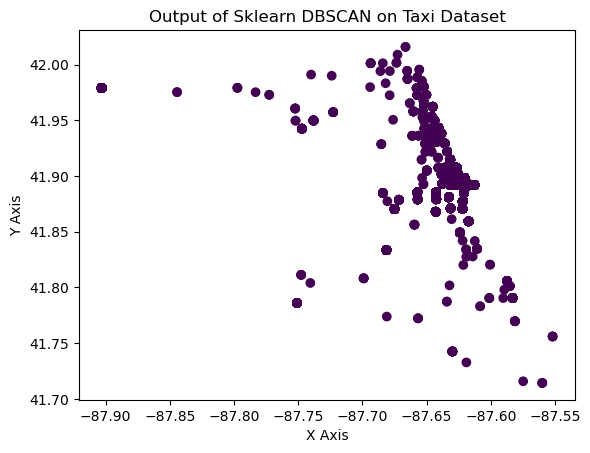

In [29]:
plt.scatter(x=taxi_df.loc[:,["Pickup Centroid Longitude"]], y=taxi_df.loc[:,["Pickup Centroid Latitude"]], c=taxi_dbscan.labels_, alpha=1)
plt.title("Output of Sklearn DBSCAN on Taxi Dataset")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

Without any data normalization and tuning of hyperparameters, the output is quite strange, we will want to revisit this later.

Let's try Agglomerative Clustering.

In [30]:
k = 10
metric = 'euclidean'
ac_linkage = 'ward'

cluster = AgglomerativeClustering(n_clusters=k, metric=metric, linkage=ac_linkage)
cluster.fit(taxi_df.loc[:,["Pickup Centroid Latitude", "Pickup Centroid Longitude"]])

AgglomerativeClustering(metric='euclidean', n_clusters=10)

In [31]:
np.unique(cluster.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

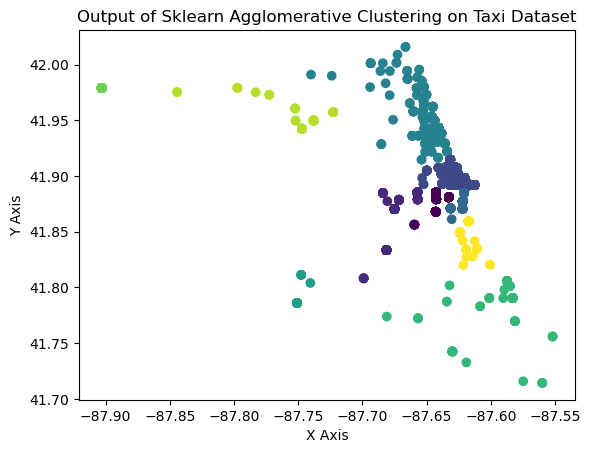

In [32]:
plt.scatter(x=taxi_df.loc[:,["Pickup Centroid Longitude"]], y=taxi_df.loc[:,["Pickup Centroid Latitude"]], c=cluster.labels_, alpha=1)
plt.title("Output of Sklearn Agglomerative Clustering on Taxi Dataset")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

From a quick running of these 3 algorithms, we see the downsides of KMeans. Because KMeans work best with spherical clusters and requires apriori knowledge of how many clusters we should have, the resulting clusters are not resembling any relations between the points as expected. DBSCAN works well with geolocation data in general, which is what this set of data is, but perhaps more finetuning of hyperparameters is needed. We will give that a try. Agglomerative Clustering with a target of 10 clusters actually produced a pretty good separation of data that somewhat makes sense but it gives no real reason for delineation between clusters.

Let's try to improve upon DBSCAN below as we know it tends to work best with geolocation. We will perform some preprocessing by normalizing data, then try to experiment with hyperparameter settings to see if we can get a cluster plot that looks to cluster dense regions in an area together.

In [33]:
# Improving DBSCAN clustering

ss = StandardScaler()
taxi_pickup_df = taxi_df.loc[:,["Pickup Centroid Longitude","Pickup Centroid Latitude"]]
taxi_pickup_df
ss.fit(taxi_pickup_df)
x = ss.transform(taxi_pickup_df)
x

array([[-2.11805489,  1.87870897],
       [-2.11805489,  1.87870897],
       [ 0.48156784, -0.69017119],
       ...,
       [-2.11805489,  1.87870897],
       [-0.66235405, -2.7113598 ],
       [ 0.23439766, -0.35102699]])

We used the linked resources in class to attempt to find the optimal epsilon value, which is done in the following 2 cells:
https://www.kaggle.com/code/gvyshnya/coronavirus-pandemic-and-google-mobility-trend-eda/notebook

In [34]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

# next, we sort and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
len(distances)

33424

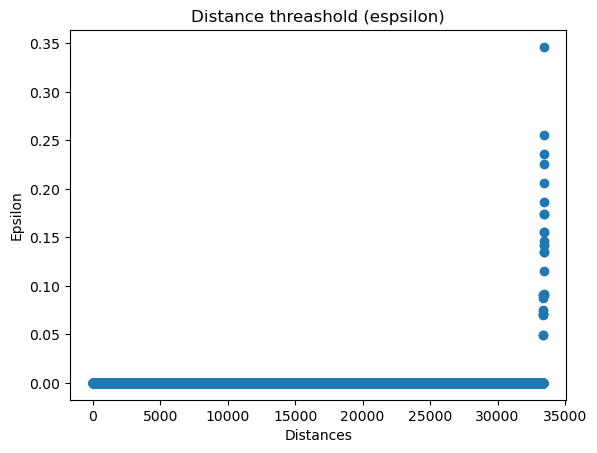

In [35]:
plt.scatter(
    y=distances,
    x=range(33424))
plt.xlabel('Distances')
plt.ylabel('Epsilon')
plt.title('Distance threashold (espsilon)')
plt.show()

Text(0.5, 1.0, 'Output of DBSCAN after Finetuning')

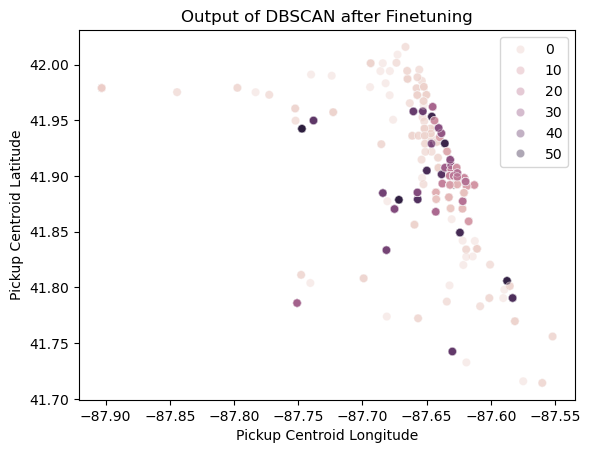

In [36]:
max_dist = 0.01
hoodsize = 10
taxi_normalized_DBSCAN = DBSCAN(eps=max_dist, min_samples=hoodsize)
taxi_normalized_DBSCAN.fit(x)

sns.scatterplot(data=taxi_pickup_df, x=taxi_pickup_df["Pickup Centroid Longitude"], y=taxi_pickup_df["Pickup Centroid Latitude"], hue=taxi_normalized_DBSCAN.labels_, alpha=0.4).set_title("Output of DBSCAN after Finetuning")

In [37]:
ss.inverse_transform(taxi_pickup_df)

array([[-96.86666509,  43.66581443],
       [-96.86666509,  43.66581443],
       [-96.83828229,  43.66126931],
       ...,
       [-96.86666509,  43.66581443],
       [-96.85077168,  43.65769322],
       [-96.84098091,  43.66186936]])

To evalute the output, let's use Silhouette Coefficient:

In [38]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, taxi_normalized_DBSCAN.labels_):.3f}")

Silhouette Coefficient: 0.988


Let's now try to answer the questions in the assignments one by one:

1. The reason why you chose the clustering algorithm(s)

Because KMeans is more suited to spheroidal clusters, the distribution of this dataset will likely produce cluster that does not accurately reflect its properties. The goal of clustering a dataset such as Chicago taxi pickup and dropoff locations is to identify areas where pickups and dropoffs occur more frequently, and these areas are likely influenced by properties such as population density. We know that DBSCAN works well with geolocation data, which is the feature we are concerned with in this dataset, so we chose to experiment with DBSCAN clustering algorithm instead. Hierarchical (or agglomerative) clustering may also be useful as it can be used to identify chains (or areas linked together), but ultimately the output from experimenting with DBSCAN seems to produce quite acceptable results.

2. Any pre-processing of the data or any hyperparameter settings

For DBSCAN, we first normalized the longitude and latitude pickup centroid data. We then used followed the sample code in [this kaggle example](https://www.kaggle.com/code/gvyshnya/coronavirus-pandemic-and-google-mobility-trend-eda/notebook) linked in class slides to find the optimal values for epsilon, one of the hyperparameter settings of the DBSCAN algorithm. We estimate this to be around 0.01. We also experimented slightly with the minimum sample size but ultimately left it at a starting value of 10.

3. Output from the algorithm(s) -- show what clusters were generated

A total of 54 clusters were generated, with 1 cluster representing noise or outliers. The resulting plot generated from the clustering of these points show a similar color gradient with respect to pickup locations from the initial EDA done on the dataset. Darker spots on the plot corresponds to those areas in the original EDA plot where pickups occur more frequently.  

4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?

Because this is unsupervised learning, we did not use have ground truths as to how many clusters there exist and whether the points are clustered properly. Per [scikit-learn's DBSCAN demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#compute-dbscan), we used [Silhouette Coefficient](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) to check whether the clusters are dense and well separated. We came up with a score of 0.988, which is very close to the maximum of 1, indicating highly dense clustering. To be honest, this result seems overly optimistic. The main metric we used to determine whether the cluster output fits in with what we expected is by simply plotting out the clusters and seeing if the denser areas are indeed grouped together and that they are separated by other smaller clusters or outlier clusters. This seems to be the case as shown in the plots above.

Now that we are done with the analysis of the Chicago taxi dataset, let's move onto the Mopsi Data set.

### Mopsi Data

Just like before, we will read in the dataset first, noting that the dataset is in txt and lacking headers, so we need to add them in. The headers was deduced from other datasets in the provided links. Since these are location data, it is highly likely the values are latitudes and longitudes.

In [39]:
mopsi_df = pd.read_csv("mopsi_data.txt", sep="\t", header=None, names=['Latitude','Longitude'])
mopsi_df

Latitude  Longitude
0        625983     297439
1        626146     297440
2        626144     297456
3        626004     297394
4        626018     297437
...         ...        ...
13462    626042     297444
13463    625977     297443
13464    626050     297404
13465    625995     297426
13466    625982     297431

[13467 rows x 2 columns]

We can also see that the latitudes and longitudes appear to be incorrectly formatted, they are much larger values than expected. We suspect the decimal points are missing, which we can fix relatively easily:

In [40]:
mopsi_df['Latitude'] = mopsi_df['Latitude']/10000
mopsi_df['Longitude'] = mopsi_df['Longitude']/10000
mopsi_df

Latitude  Longitude
0       62.5983    29.7439
1       62.6146    29.7440
2       62.6144    29.7456
3       62.6004    29.7394
4       62.6018    29.7437
...         ...        ...
13462   62.6042    29.7444
13463   62.5977    29.7443
13464   62.6050    29.7404
13465   62.5995    29.7426
13466   62.5982    29.7431

[13467 rows x 2 columns]

In [41]:
mopsi_df.describe()

Latitude     Longitude
count  13467.000000  13467.000000
mean      62.509478     28.900467
std        0.784433      2.039943
min       59.924700     21.201600
25%       62.593000     29.616400
50%       62.601800     29.744800
75%       62.619200     29.779650
max       69.783500     31.432800

In [42]:
mopsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   13467 non-null  float64
 1   Longitude  13467 non-null  float64
dtypes: float64(2)
memory usage: 210.5 KB


After doing some basic checks, we can see that there are a total of 13467 entries with no missing values. There are only 2 columns of data of type float, corresponding to the latitude and longitude. Let's try to plot this out and see if the density and distribution of the datapoints are as expected.

Text(0.5, 1.0, 'Location Data from Mopsi Dataset')

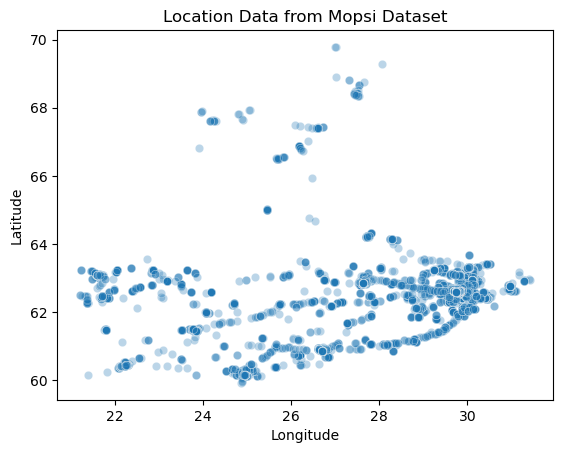

In [43]:
sns.scatterplot(data=mopsi_df, x="Longitude", y="Latitude", alpha=0.3).set_title("Location Data from Mopsi Dataset")

The plot above compares somewhat favorably against the picture that was from the dataset, but the scale is just slightly off, likely due to Finland's high latitude. At least we can see some clear patterns and can recognize that the data forms the general shape:

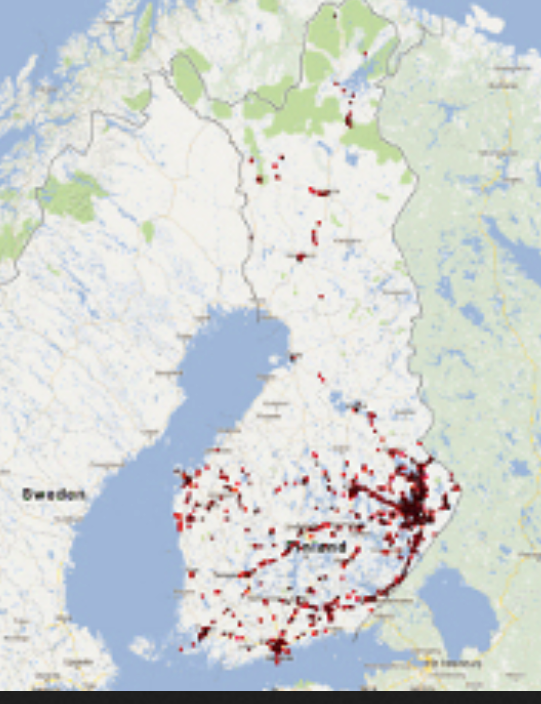

Since we are dealing once again with population data, we are probably looking at DBSCAN. Let's do some preprocessing of data then play with hyperparameters again, then see the results.

In [44]:
ss = StandardScaler()
ss.fit(mopsi_df)
x = ss.transform(mopsi_df)
x

array([[0.11323554, 0.41347453],
       [0.13401564, 0.41352356],
       [0.13376067, 0.41430792],
       ...,
       [0.12177705, 0.41175874],
       [0.11476536, 0.41283724],
       [0.11310805, 0.41308235]])

In [45]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

# next, we sort and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
len(distances)

13467

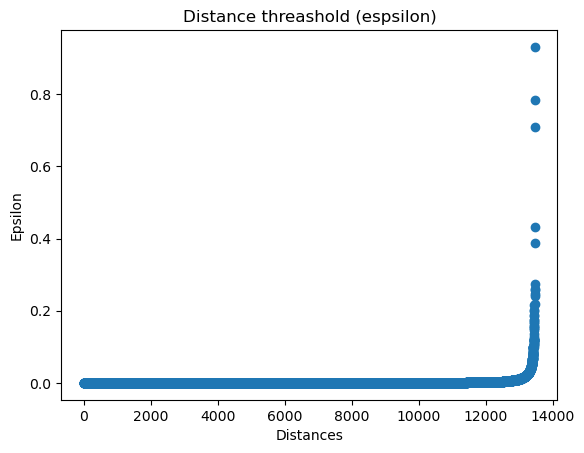

In [46]:
plt.scatter(
    y=distances,
    x=range(13467))
plt.xlabel('Distances')
plt.ylabel('Epsilon')
plt.title('Distance threashold (espsilon)')
plt.show()

maybe we can experiment with a grid search approach to find the best hyperparameter settings.

In [47]:
i = 0.01
best_dist = 0.01
best_hoodsize = 3
best_coeff = 0
j = 3
while i <= 0.1:
    while j <= 25:
        mopsi_normalized_DBSCAN = DBSCAN(eps=i, min_samples=j)
        mopsi_normalized_DBSCAN.fit(x)
        score = metrics.silhouette_score(x, mopsi_normalized_DBSCAN.labels_)
        # print(score)
        if score > best_coeff:
            best_dist = i
            best_hoodsize = j
            best_coeff = score
        j += 1
    i += 0.005

In [48]:
print(best_dist)
print(best_hoodsize)
print(best_coeff)

0.01
5
0.48406033321583336


In [49]:
max_dist = 0.01
hoodsize = 5
mopsi_normalized_DBSCAN = DBSCAN(eps=max_dist, min_samples=hoodsize)
mopsi_normalized_DBSCAN.fit(x)

DBSCAN(eps=0.01)

In [50]:
np.unique(mopsi_normalized_DBSCAN.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

Text(0.5, 1.0, 'Output of DBSCAN Clustering on Mopsi Dataset')

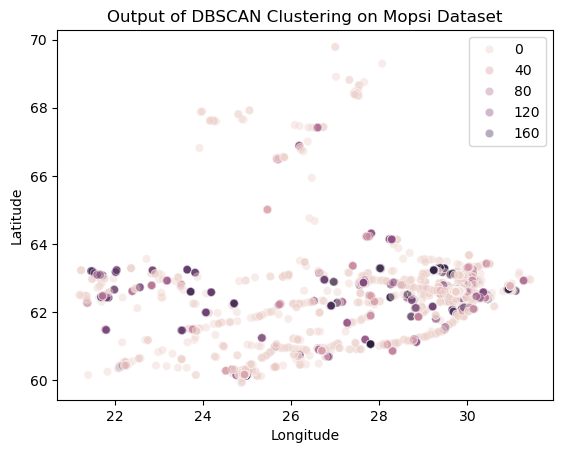

In [51]:
sns.scatterplot(data=mopsi_df, x=mopsi_df["Longitude"], y=mopsi_df["Latitude"], hue=mopsi_normalized_DBSCAN.labels_, alpha=0.4).set_title("Output of DBSCAN Clustering on Mopsi Dataset")

In [52]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, mopsi_normalized_DBSCAN.labels_):.3f}")

Silhouette Coefficient: 0.484


Now that we have tentatively finished with Mopsi dataset, let's now try to answer the questions in the assignments one by one:

1. The reason why you chose the clustering algorithm(s)

Similar to the Chicago taxi dataset, this dataset concerns geolocation data, which means the clusters that exist are likely not in spheroidal shapes. We rely once again on DBSCAN to see if we can replicate the same kind of results as before under the same kinds of reasoning.

2. Any pre-processing of the data or any hyperparameter settings

Similar to the Chicago dataset, we will perform the following:
- normalize the data
- find the optimal epsilon
- experiment with minimum sample size

An additional step was needed in the beginning to clean up the dataset because we noted that the longitude and latitude information was provided in .txt format and missing the decimal point. We used other datasets in the same website to determine that these values are indeed longitude and latitude values and performed the necessary steps to reflect them as such. We were able to plot out these points in a 2D space to confirm that our assumptions are correct.

We follow the same steps as before to normalize data. To find the optimal hyperparameters, we performed grid search across some intuitive suitable values based on what we know before and ended up with an epsilon of 0.01 and a minimum sample size of 5 when evaluating against the Silhouette Coefficient output. During experimentation, we found that as the minimum sample size increased, the numbers of resultant clusters decreased. A sample size of 5 produced a lot of clusters but it did provide the highest Silhouette Coefficient.

3. Output from the algorithm(s) -- show what clusters were generated

A total of 189 clusters were generated, with 1 cluster representing noise or outliers. Just like before, we want the resultant cluster plot to show darker areas around areas with dense population. From the graph and output produced, we see that most of the points are in cluster 0, which may not be ideal. We also do not see the same kind of trend as we initially saw with the Chicago dataset.

4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?

We used Silhouette Coefficient just like before to check whether the clusters are dense and well separated. We came up with a score of 0.484. The result is not optimal and we can see this in the resulting plot. Dense population centers do seem to be grouped together but the coloring of the graph makes it difficult to determine how the points are clustered together.

The takeaway seems to be that more learning on visualization of data is important. We want clear plots showing where clusters are in order to convey results with more confidence.